# Breast Cancer Classification using K Means Clustering

##### __Made by [Ahmad Shafique](https://www.linkedin.com/in/ahmadshafique443)__  

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

## Loading our Dataset

In [2]:
breast_cancer_data = load_breast_cancer()

## Dataset overview

In [3]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Features

In [5]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
print(breast_cancer_data.data.shape)
print(breast_cancer_data.target.shape)

(569, 30)
(569,)


## Choosing Independet and Dependent variables

In [7]:
X = breast_cancer_data.data
y = breast_cancer_data.target

## Scaling our input data

In [8]:
from sklearn.preprocessing import scale
X = scale(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Splitting our data for training and testing purposes

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=38)

## Finding n_clusters where the accuracy is maximum

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
clusters = np.arange(1,11)
accuracy = []
for cluster in clusters:
    model = KMeans(n_clusters=cluster, random_state=22)
    model.fit(X_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

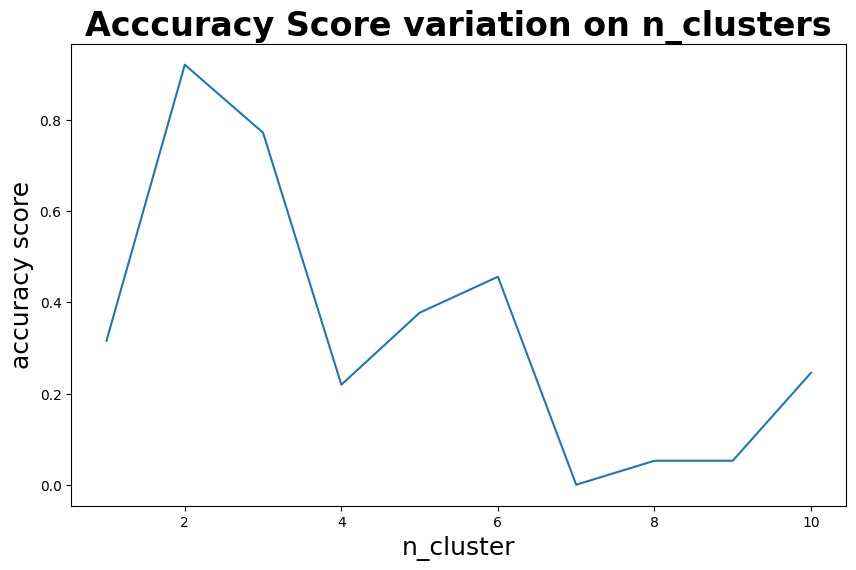

In [11]:
plt.figure(figsize=(10,6))
plt.plot(clusters, accuracy)
plt.xlabel('n_cluster', fontdict = {'fontsize':18})
plt.ylabel('accuracy score', fontdict = {'fontsize':18})
plt.title('Acccuracy Score variation on n_clusters', fontdict = {'fontweight':'bold', 'fontsize':24})
plt.show()

## Model is performing best when clusters are 2 so choosing n_clusters = 2

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
model = KMeans(n_clusters=2, random_state=22)
model.fit(X_train)
y_pred = model.predict(X_test)

## Evaluting our Model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy,2))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Confusion Matrix:
[[28  8]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        36
           1       0.91      0.99      0.94        78

    accuracy                           0.92       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.92      0.92       114

